In [1]:
# Libraries used 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Dataset

df = pd.read_csv("train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
# Basic data check
df.shape
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [5]:
# Date Handling
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

In [7]:
# Feature Engineering 

# A. Order Processing Delay 
df['shipping_delay_days'] = (df['Ship Date'] - df['Order Date']).dt.days

In [8]:
# B. Monthly Sales Signal
df['order_month'] = df['Order Date'].dt.to_period('M')

In [9]:
# Sales Performance Signals

# A. Monthly Sales Trend
monthly_sales = df.groupby('order_month')['Sales'].sum()
monthly_sales

order_month
2015-01     14205.7070
2015-02      4519.8920
2015-03     55205.7970
2015-04     27906.8550
2015-05     23644.3030
2015-06     34322.9356
2015-07     33781.5430
2015-08     27117.5365
2015-09     81623.5268
2015-10     31453.3930
2015-11     77907.6607
2015-12     68167.0585
2016-01     18066.9576
2016-02     11951.4110
2016-03     32339.3184
2016-04     34154.4685
2016-05     29959.5305
2016-06     23599.3740
2016-07     28608.2590
2016-08     36818.3422
2016-09     63133.6060
2016-10     31011.7375
2016-11     75249.3995
2016-12     74543.6012
2017-01     18542.4910
2017-02     22978.8150
2017-03     51165.0590
2017-04     38679.7670
2017-05     56656.9080
2017-06     39724.4860
2017-07     38320.7830
2017-08     30542.2003
2017-09     69193.3909
2017-10     59583.0330
2017-11     79066.4958
2017-12     95739.1210
2018-01     43476.4740
2018-02     19920.9974
2018-03     58863.4128
2018-04     35541.9101
2018-05     43825.9822
2018-06     48190.7277
2018-07     44825.1040

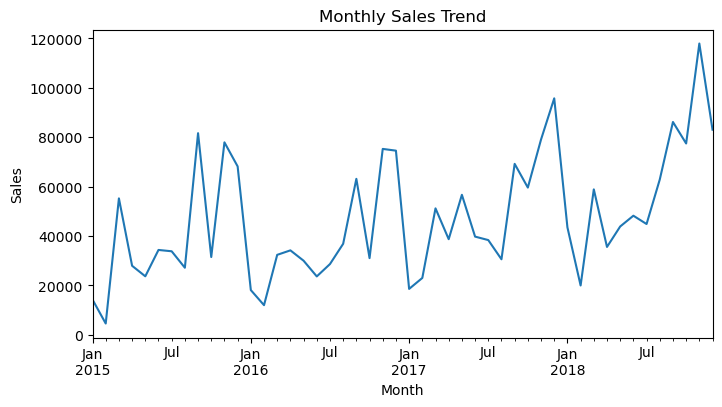

In [10]:
# B. Plot Monthly Sales
plt.figure(figsize=(8,4))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

In [13]:
# Category Momentum Signal

category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales

Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64

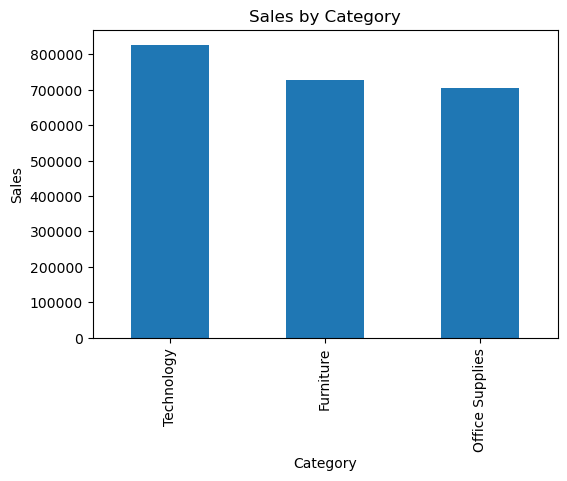

In [14]:
# Plot Category Sales
plt.figure(figsize=(6,4))
category_sales.plot(kind='bar')
plt.title("Sales by Category")
plt.ylabel("Sales")
plt.show()

In [18]:
# Regional Risk Signal
region_sales = df.groupby('Region')['Sales'].sum().sort_values()
region_sales

Region
South      389151.4590
Central    492646.9132
East       669518.7260
West       710219.6845
Name: Sales, dtype: float64

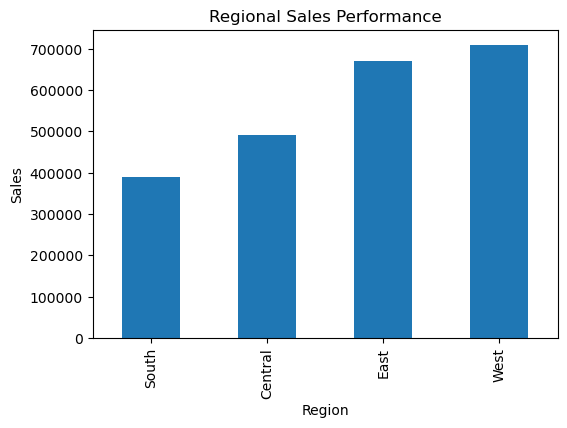

In [19]:
# Plot Regional Sales

plt.figure(figsize=(6,4))
region_sales.plot(kind='bar')
plt.title("Regional Sales Performance")
plt.ylabel("Sales")
plt.show()

In [20]:
# Shipping Delay Risk Analysis
df.groupby('shipping_delay_days')['Sales'].mean().head(10)

shipping_delay_days
0    236.894173
1    183.746874
2    277.107123
3    205.097288
4    228.675412
5    229.254844
6    201.461437
7    266.950228
Name: Sales, dtype: float64

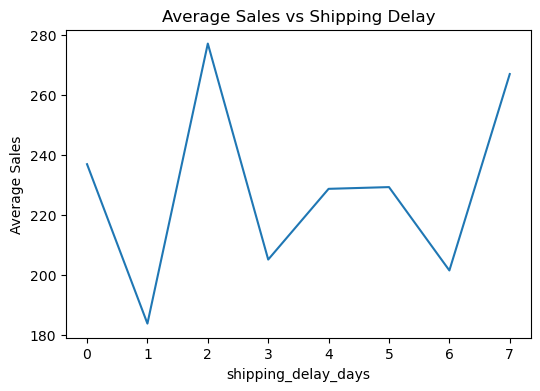

In [21]:
# Plot Shipping Delay Impact
plt.figure(figsize=(6,4))
df.groupby('shipping_delay_days')['Sales'].mean().plot()
plt.title("Average Sales vs Shipping Delay")
plt.ylabel("Average Sales")
plt.show()

In [22]:
# Business Signal Summary Table

signal_summary = pd.DataFrame({
    'Total Sales': df['Sales'].sum(),
    'Average Sales': df['Sales'].mean(),
    'Average Shipping Delay': df['shipping_delay_days'].mean()
}, index=[0])

signal_summary

,Total Sales,Average Sales,Average Shipping Delay
0,2.261537e+06,230.769059,3.961122
